# EDA

## Analysis of the crimes depending on groups

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/sample_data/Crime_Data_from_2020_to_Present.csv')

In [ ]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [ ]:
df = df[[ 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME', 'Vict Age', 'Vict Sex']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743817 entries, 0 to 743816
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   DATE OCC   743817 non-null  object
 1   TIME OCC   743817 non-null  int64 
 2   AREA       743817 non-null  int64 
 3   AREA NAME  743817 non-null  object
 4   Vict Age   743817 non-null  int64 
 5   Vict Sex   646777 non-null  object
dtypes: int64(3), object(3)
memory usage: 34.0+ MB


In [ ]:
df.describe()

,TIME OCC,AREA,Vict Age
count,743817.000000,743817.000000,743817.000000
mean,1334.877319,10.717617,29.920445
std,653.669683,6.092044,21.723517
min,1.000000,1.000000,-2.000000
25%,900.000000,6.000000,11.000000
50%,1415.000000,11.000000,31.000000
75%,1900.000000,16.000000,45.000000
max,2359.000000,21.000000,120.000000


In [ ]:
time_field = 'DATE OCC' #time when the crime occurred


df[time_field] = df[time_field].apply(lambda x: x.split()[0])
df['Year'] = df[time_field].apply(lambda x: int(x.split('/')[-1]))
df['Month'] = df[time_field].apply(lambda x: int(x.split('/')[0]))
df['Day'] = df[time_field].apply(lambda x: int(x.split('/')[1]))
df['Hour'] = df['TIME OCC'].apply(lambda x: x//100)

def GetAgeCategory(age):
    if age<=4: return 'Baby'
    if age<=12: return 'Child'
    elif age<=19: return 'Teen'
    elif age<=39: return 'Adult'
    elif age<=59: return 'Middle'
    else: return 'Senior'

df['Vict Age Cat'] = df['Vict Age'].apply(lambda x: GetAgeCategory(x))

df.drop(df[(df['Year']==2023) & (df['Month']==6)].index, inplace=True) # data in 2023/6 is incomplete and thus removed
df.tail(100)

,DATE OCC,TIME OCC,AREA,AREA NAME,Vict Age,Vict Sex,Year,Month,Day,Hour,Vict Age Cat
743700,03/01/2023,1145,11,Northeast,66,M,2023,3,1,11,Senior
743701,01/24/2023,100,14,Pacific,34,M,2023,1,24,1,Adult
743702,02/02/2023,940,20,Olympic,0,X,2023,2,2,9,Baby
743703,05/28/2023,2315,1,Central,28,M,2023,5,28,23,Adult
743705,03/24/2023,815,3,Southwest,0,NaN,2023,3,24,8,Baby
...,...,...,...,...,...,...,...,...,...,...,...
743812,05/25/2023,1100,15,N Hollywood,25,M,2023,5,25,11,Adult
743813,01/26/2023,1800,16,Foothill,23,M,2023,1,26,18,Adult
743814,03/22/2023,1000,16,Foothill,25,F,2023,3,22,10,Adult
743815,04/12/2023,1630,12,77th Street,29,M,2023,4,12,16,Adult


In [ ]:
df.drop(df[(df['Year']<2021)].index, inplace=True)
df.drop_duplicates(inplace=True)
df.dropna(subset=['Vict Sex'],inplace=True)
df.drop(df[(df['Vict Sex'] != 'F') & (df['Vict Sex'] != 'M')].index, inplace=True)
df.head(100)

,DATE OCC,TIME OCC,AREA,AREA NAME,Vict Age,Vict Sex,Year,Month,Day,Hour,Vict Age Cat
113164,02/09/2021,2200,10,West Valley,29,F,2021,2,9,22,Adult
140577,06/16/2021,1830,16,Foothill,53,F,2021,6,16,18,Middle
199263,04/25/2021,300,16,Foothill,32,M,2021,4,25,3,Adult
199264,07/13/2021,1525,6,Hollywood,49,M,2021,7,13,15,Middle
199265,11/05/2021,1700,11,Northeast,30,M,2021,11,5,17,Adult
...,...,...,...,...,...,...,...,...,...,...,...
199383,09/16/2021,2000,19,Mission,50,M,2021,9,16,20,Middle
199385,02/26/2021,2000,2,Rampart,24,F,2021,2,26,20,Adult
199386,09/18/2021,915,1,Central,52,F,2021,9,18,9,Middle
199387,02/01/2021,1201,1,Central,47,M,2021,2,1,12,Middle


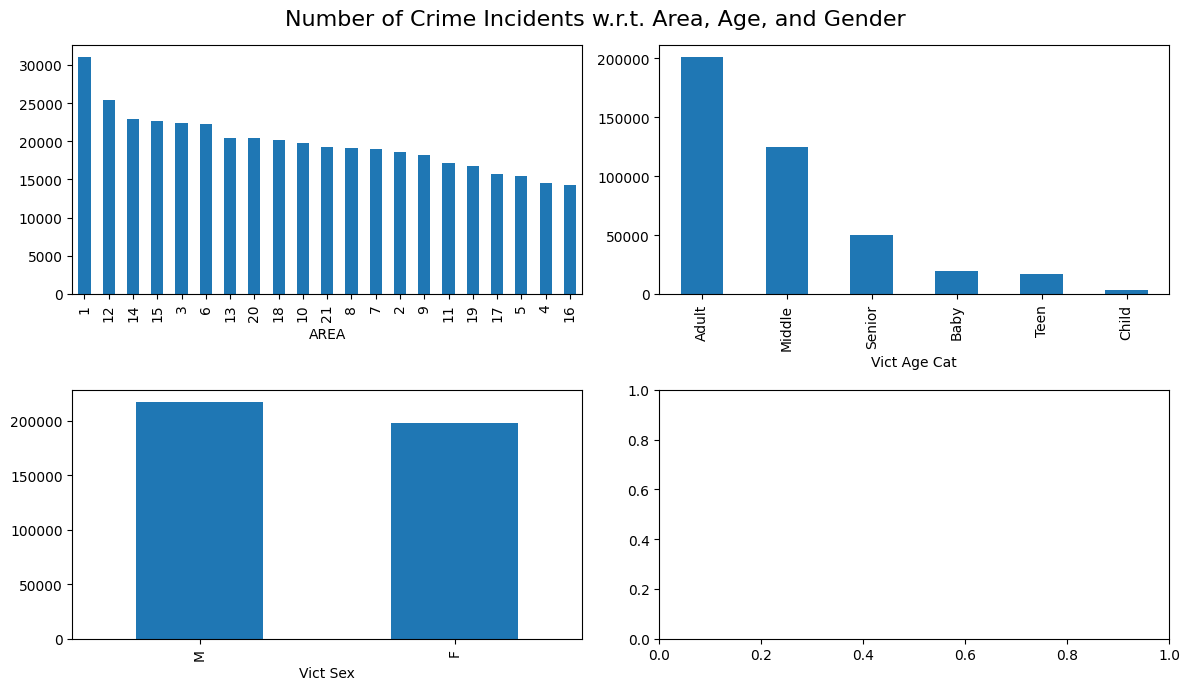

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 7))

df.groupby(['AREA'])['Day'].count().sort_values(ascending=False).plot(kind='bar', ax=axes[0,0])
df.groupby(['Vict Age Cat'])['Day'].count().sort_values(ascending=False).plot(kind='bar', ax=axes[0,1])
df.groupby(['Vict Sex'])['Day'].count().sort_values(ascending=False).plot(kind='bar', ax=axes[1,0])
fig.suptitle('Number of Crime Incidents w.r.t. Area, Age, and Gender', fontsize=16)
plt.tight_layout()

### Time Analysis

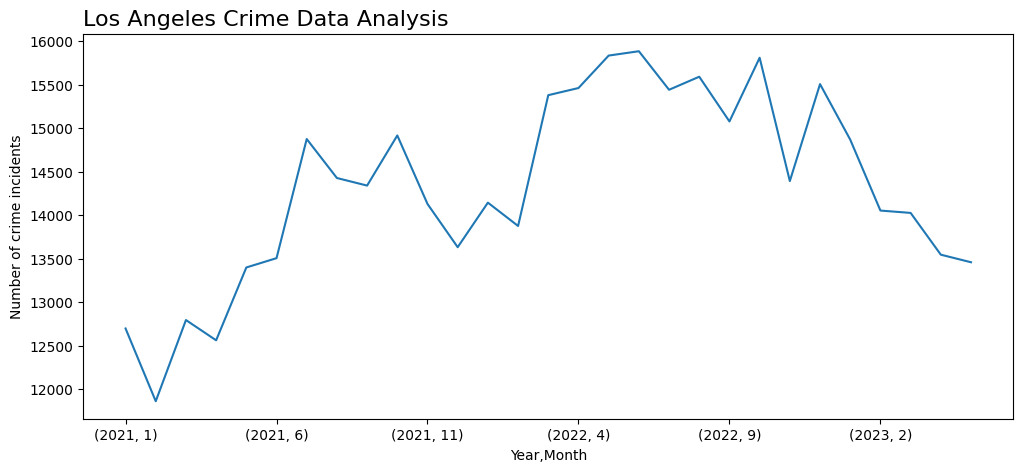

In [ ]:
df.groupby(['Year', 'Month'])['Day'].count().plot(kind='line', figsize=(12, 5))
plt.ylabel('Number of crime incidents')
plt.title('Los Angeles Crime Data Analysis', loc='left', fontsize=16)
plt.show()

<Axes: title={'center': 'Number of Crime Incidents over 12 Months'}, xlabel='Month'>

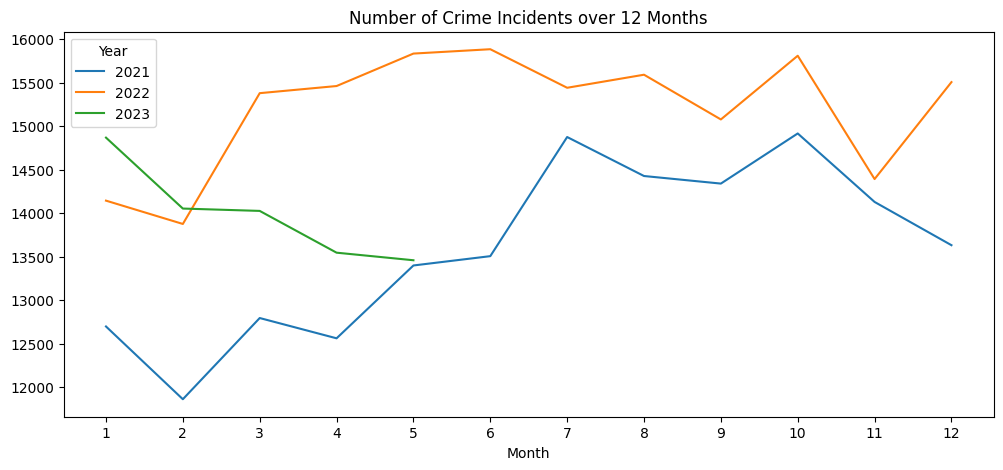

In [ ]:
pltdata = df.groupby(['Month', 'Year'])['Day'].count().unstack()
pltdata.plot(kind='line', figsize=(12, 5), xticks=range(1, 13), title='Number of Crime Incidents over 12 Months')

Text(0.5, 1.0, 'Number of Crime Incidents over 24 Hours')

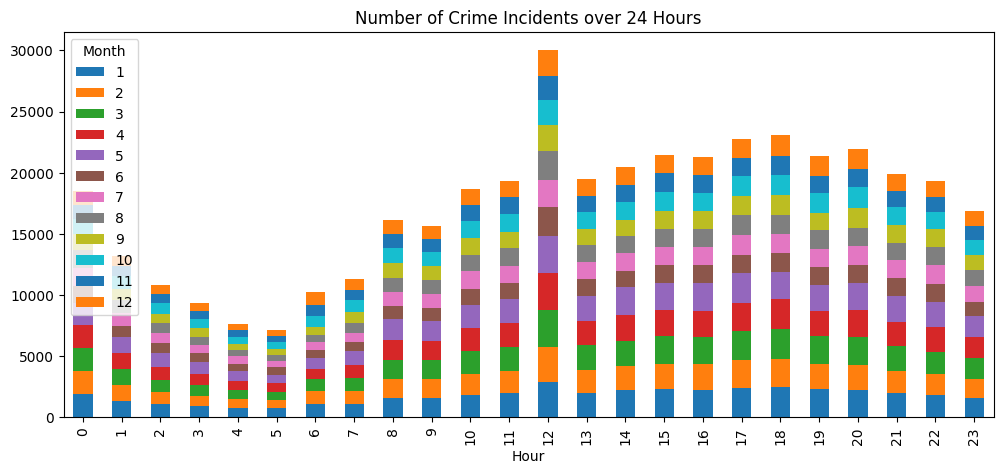

In [ ]:
df.groupby(['Hour', 'Month'])['Day'].count().unstack().plot(kind='bar', figsize=(12, 5), stacked=True)
plt.title('Number of Crime Incidents over 24 Hours')

Text(0.5, 1.0, 'Number of Crime Incidents over 24 Hours in Top 5 Geographic Areas')

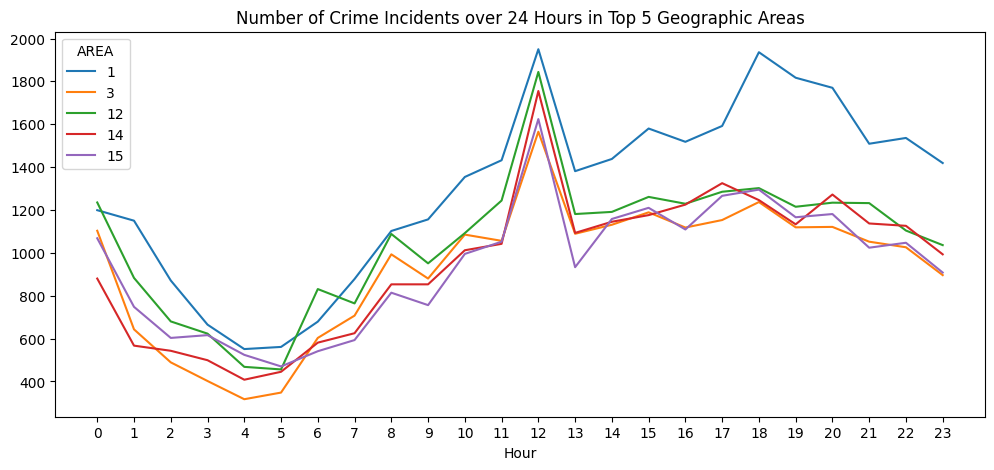

In [ ]:
top5areas = df.groupby(['AREA'])['Day'].count().sort_values(ascending=False).index[:5]
data = df[df['AREA'].isin(top5areas)]
data.groupby(['Hour', 'AREA'])['Day'].count().unstack().plot(kind='line', figsize=(12, 5), xticks=range(0, 24))
plt.title('Number of Crime Incidents over 24 Hours in Top 5 Geographic Areas')

In Area 1 the number of crime incidents is particularly higher than other areas around 18:00-20:00.

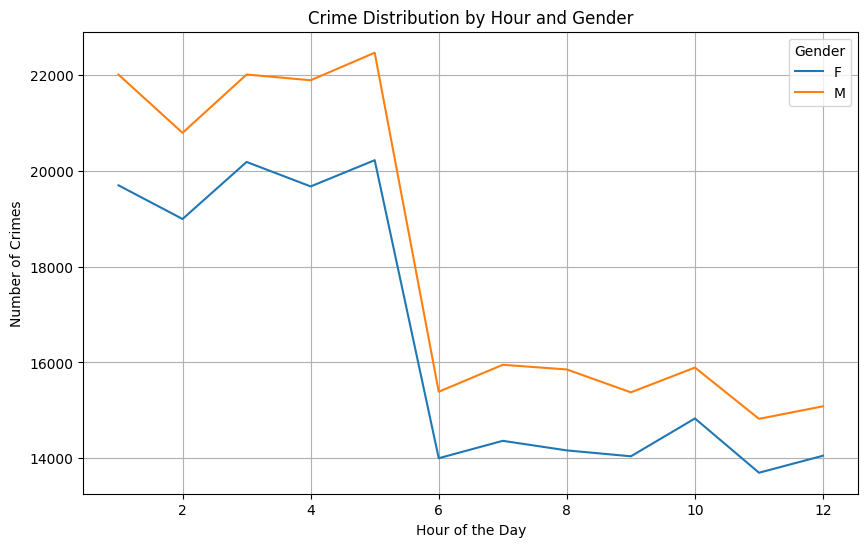

In [ ]:
crime_by_hour_gender = df.groupby(['Month', 'Vict Sex']).size().unstack()

# Plotting
plt.figure(figsize=(10,6))
for gender in crime_by_hour_gender.columns:
    plt.plot(crime_by_hour_gender.index, crime_by_hour_gender[gender], label=gender)

# Adding labels and title
plt.title('Crime Distribution by Hour and Gender')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crimes')
plt.legend(title='Gender')
plt.grid(True)
plt.show()

### Area Names

In [ ]:
area_names = df[['AREA', 'AREA NAME']].drop_duplicates().sort_values(by='AREA NAME')
area_names

,AREA,AREA NAME
199269,12,77th Street
199270,1,Central
199349,17,Devonshire
140577,16,Foothill
199279,5,Harbor
199286,4,Hollenbeck
199264,6,Hollywood
199280,19,Mission
199300,15,N Hollywood
199321,13,Newton


Text(0.5, 1.0, 'Number of Crime Incidents over Victim Ages')

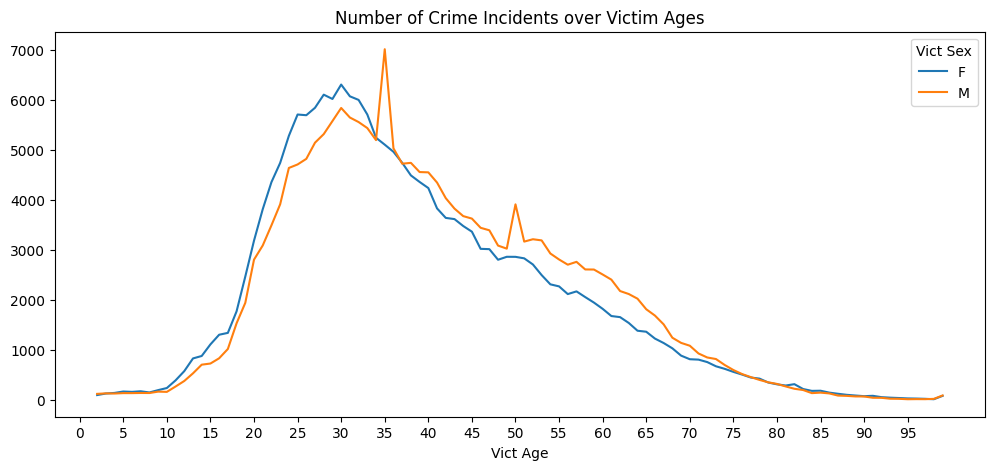

In [ ]:
data = df[(df['Vict Age']>0)]
plt_data = data.groupby(['Vict Age', 'Vict Sex'])['Day'].count().unstack()
plt_data.plot(kind='line', figsize=(12, 5), xticks=range(0, 100, 5))
plt.title('Number of Crime Incidents over Victim Ages')

Text(0.5, 1.0, 'Number of Crime Incidents over Victim Ages')

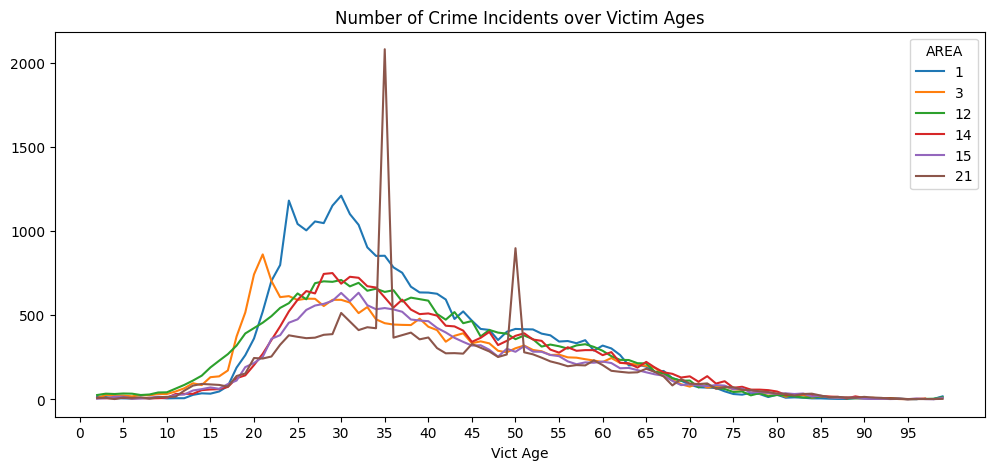

In [ ]:
top5areas = list(df.groupby(['AREA'])['Day'].count().sort_values(ascending=False).index[:5])
data = df[(df['Vict Age']>0) & (df['AREA'].isin(top5areas+[21]))]

plt_data = data.groupby(['Vict Age', 'AREA'])['Day'].count().unstack()
plt_data.plot(kind='line', figsize=(12, 5), xticks=range(0, 100, 5))
plt.title('Number of Crime Incidents over Victim Ages')

Text(0.5, 1.0, 'Number of Crime Incidents over Geographic Areas')

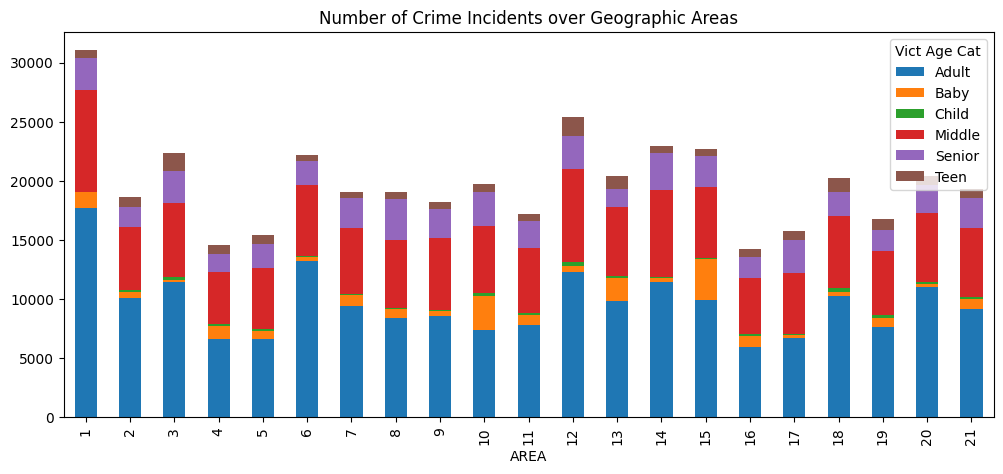

In [ ]:
plt_data = df.groupby(['AREA', 'Vict Age Cat'])['Day'].count().unstack()
plt_data.plot(kind='bar', stacked=True, figsize=(12, 5))
plt.title('Number of Crime Incidents over Geographic Areas')

In [ ]:
# Aggregate incidents per month for time series prediction
monthly_data = crime_data.groupby('Month').size().reset_index(name='crime_count')

# Normalize the data for LSTM
scaler = MinMaxScaler()
monthly_data['crime_count_scaled'] = scaler.fit_transform(monthly_data[['crime_count']])

# Create sequences for LSTM model training
def create_sequences(data, seq_length):
 X, y = [], []
 for i in range(len(data) - seq_length):
     X.append(data[i:i + seq_length])
     y.append(data[i + seq_length])
 return np.array(X), np.array(y)

seq_length = 12  # Use the past 12 months to predict the next month
X, y = create_sequences(monthly_data['crime_count_scaled'].values, seq_length)

# Reshape for LSTM input
X = X.reshape(X.shape[0], X.shape[1], 1)


NameError: name 'MinMaxScaler' is not defined